In [62]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import random
import pandas as pd
import os

from sklearn.model_selection import train_test_split

import skimage
from skimage import io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image, ImageFilter


import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import UpSampling2D
from keras.layers import ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
import keras

import keras.utils as np_utils

In [2]:
#This is the Data to be Trained and Labeled.
X = []
y = []

X_images = []
y_images = []

#Data Paths
train_image_path = r"C:\Users\buckf\Documents\Practicum_2\Data\train\images"
train_mask_path = r"C:\Users\buckf\Documents\Practicum_2\Data\train\masks"


image_list = os.listdir(train_image_path)
mask_list = os.listdir(train_mask_path)

for image_num in range(len(image_list)):
    #Gets the Path to the Mask
    certain_image_path = os.path.join(train_image_path, image_list[image_num])
    image_img = Image.open(certain_image_path).convert('L')
    image_pix = np.array(image_img.getdata()).reshape(image_img.size[0], image_img.size[1], 1)
    X.append(image_pix)
    X_images.append(image_img)

for mask_num in range(len(mask_list)):
    #Gets the Path to the Mask
    certain_mask_path = os.path.join(train_mask_path, mask_list[mask_num])
    mask_img = Image.open(certain_mask_path).convert('L')
    mask_pix = np.array(mask_img.getdata()).reshape(mask_img.size[0], mask_img.size[1], 1)
    y.append(mask_pix)
    y_images.append(mask_img)
    
X = np.array(X, dtype = 'float32')
y = np.array(y, dtype = 'float32')

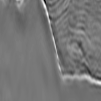

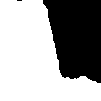

In [3]:
#This is how data looks. 
#The top is the what we need to seperate salt from sediment.
#The bottom is the mask or label we need to predict. 
display(X_images[10], y_images[10])

In [4]:
X.shape

(4000, 101, 101, 1)

In [5]:
X[10].shape

(101, 101, 1)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.5, shuffle = True)

c:\users\buckf\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
X_train.shape

(2000, 101, 101, 1)

In [8]:
K.clear_session

<function keras.backend.tensorflow_backend.clear_session()>

In [9]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer
# hint: you need Flatten() before the first dense layer
    
    
    model = Sequential()
    model.add(Conv2D(1, kernel_size = (1,1), activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2], 1)))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Dropout(0.25))
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
# build the model
model = simple_cnn_model()

# Fit the model

t0 = time.time()
log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
t1 = time.time()
print(t1-t0, " seconds")
# Final evaluation of the model
scores = model.evaluate(X_val, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 2000 samples, validate on 2000 samples
Epoch 1/20
2000/2000 [==============================] - 4s 2ms/step - loss: 15979.2512 - acc: 0.2040 - val_loss: 13003.3307 - val_acc: 0.0201
Epoch 2/20
2000/2000 [==============================] - 1s 586us/step - loss: 14541.4925 - acc: 0.2042 - val_loss: 12639.3680 - val_acc: 0.0201
Epoch 3/20
2000/2000 [==============================] - 2s 820us/step - loss: 13782.3492 - acc: 0.2042 - val_loss: 12572.2008 - val_acc: 0.0201
Epoch 4/20
2000/2000 [==============================] - 1s 663us/step - loss: 13424.5303 - acc: 0.2041 - val_loss: 12628.4017 - val_acc: 0.0201
Epoch 5/20
2000/2000 [==============================] - 1s 596us/step - loss: 13283.7986 - acc: 0.2042 - val_loss: 12711.7230 - val_acc: 0.0202
Epoch 6/20
2000/2000 [==============================] - 1s 578us/step - loss: 13233.7032 - acc: 0.2043 - val_loss: 12783.1829 - val_acc: 0.0202
Epoch 7/20
2000/2000 [==============================] - 1s 616us/step - loss: 13215.4597 -

In [ ]:
K.clear_session()

In [12]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))

    model.add(Conv2D(32, kernel_size = (3,3),
                     padding = 'same',
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    model.add(Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(2,2)))
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# # build the model
# model = simple_cnn_model()

# # Fit the model

# t0 = time.time()
# log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# t1 = time.time()
# print(t1-t0, " seconds")
# # Final evaluation of the model
# scores = model.evaluate(X_val, y_val, verbose=0)
# print("CNN Error: %.2f%%" % (100-scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 101, 101, 32)      320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 101, 101, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 101, 101, 1)       289       
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 2000 samples
Epoch 1/20
2000/2000 [==============================] - 6s 3ms/step - loss: 12836.3239 - acc

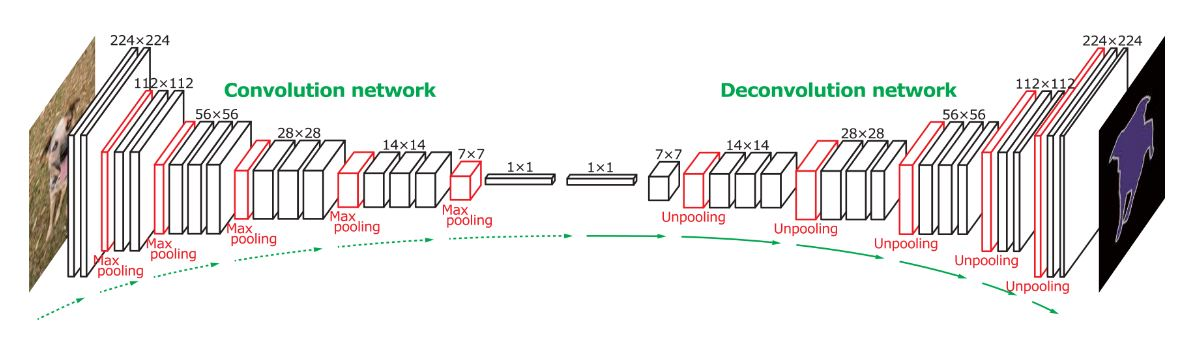

In [16]:
from IPython.display import Image
Image(filename=r"C:\Users\buckf\Documents\Practicum_2\Presentation_Photos\Network_Structure.JPG")

In [83]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    
    #Convolution 1:
    model.add(Conv2D(50, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))
    
    #Convolution 2:
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    model.add(ZeroPadding2D(padding=(1,1)))
    
    #Convolution 3
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Convolution 4
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Max-Pool 2
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    
    
    
    model.add(Conv2DTranspose(1, kernel_size= (3,3), activation='relu', padding='same'))
    
    
    model.add(UpSampling2D(size=(3,3)))
    
    
    
    model.add(UpSampling2D(size=(3,3)))
    model.add(ZeroPadding2D(padding=(1,1)))
    
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_231 (Conv2D)          (None, 101, 101, 50)      500       
_________________________________________________________________
conv2d_232 (Conv2D)          (None, 101, 101, 50)      22550     
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 33, 33, 50)        0         
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 35, 35, 50)        0         
_________________________________________________________________
conv2d_233 (Conv2D)          (None, 35, 35, 50)        22550     
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 35, 35, 50)        22550     
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 11, 11, 50)        0         
__________

In [86]:
preds = model.predict(X_val)

In [101]:
sample_pred = preds[1]

In [102]:
sample_pred

array([[[ 0.      ],
        [ 0.      ],
        [ 0.      ],
        ...,
        [ 0.      ],
        [ 0.      ],
        [ 0.      ]],

       [[ 0.      ],
        [ 0.      ],
        [ 0.      ],
        ...,
        [16.890196],
        [16.890196],
        [ 0.      ]],

       [[ 0.      ],
        [ 0.      ],
        [ 0.      ],
        ...,
        [16.890196],
        [16.890196],
        [ 0.      ]],

       ...,

       [[ 0.      ],
        [10.637447],
        [10.637447],
        ...,
        [10.864102],
        [10.864102],
        [ 0.      ]],

       [[ 0.      ],
        [10.637447],
        [10.637447],
        ...,
        [10.864102],
        [10.864102],
        [ 0.      ]],

       [[ 0.      ],
        [ 0.      ],
        [ 0.      ],
        ...,
        [ 0.      ],
        [ 0.      ],
        [ 0.      ]]], dtype=float32)

In [105]:
sample_pred = np.asarray(sample_pred, np.uint8)

In [106]:
Image.fromarray(sample_pred)

TypeError: Cannot handle this data type

In [61]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))

    model.add(Conv2D(32, kernel_size = (3,3),
                     padding = 'same',
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# # build the model
# model = simple_cnn_model()

# # Fit the model

# t0 = time.time()
# log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# t1 = time.time()
# print(t1-t0, " seconds")
# # Final evaluation of the model
# scores = model.evaluate(X_val, y_val, verbose=0)
# print("CNN Error: %.2f%%" % (100-scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_173 (Conv2D)          (None, 101, 101, 32)      320       
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 101, 101, 32)      9248      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_transpose_28 (Conv2DT (None, 101, 101, 1)       289       
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 2000 samples
Epoch 1/20
2000/2000 [==============================] - 8s 4ms/step - loss: 12812.1761 - acc

KeyboardInterrupt: 

In [ ]:
def iou(preds, labels, C, EMPTY=1., ignore=None, per_image=False):
    """
    Array of IoU for each (non ignored) class
    """
    if not per_image:
        preds, labels = (preds,), (labels,)
    ious = []
    for pred, label in zip(preds, labels):
        iou = []    
        for i in range(C):
            if i != ignore: # The ignored label is sometimes among predicted classes (ENet - CityScapes)
                intersection = ((label == i) & (pred == i)).sum()
                union = ((label == i) | ((pred == i) & (label != ignore))).sum()
                if not union:
                    iou.append(EMPTY)
                else:
                    iou.append(float(intersection) / union)
        ious.append(iou)
    ious = map(mean, zip(*ious)) # mean accross images if per_image
    return 100 * np.array(ious)